In [126]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np 
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [127]:
dataFrame = pd.read_csv('Data_Set.csv')

In [128]:
dataFrame

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [129]:
dataset = dataFrame.values

In [130]:
dataset

array([[8.420e+02, 0.000e+00, 2.200e+00, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       [1.021e+03, 1.000e+00, 5.000e-01, ..., 1.000e+00, 0.000e+00,
        2.000e+00],
       [5.630e+02, 1.000e+00, 5.000e-01, ..., 1.000e+00, 0.000e+00,
        2.000e+00],
       ...,
       [1.911e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 0.000e+00,
        3.000e+00],
       [1.512e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [5.100e+02, 1.000e+00, 2.000e+00, ..., 1.000e+00, 1.000e+00,
        3.000e+00]])

In [131]:
X_var = dataset[:,0:20]

In [132]:
Y_var = dataset[:,20]

In [133]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scl = min_max_scaler.fit_transform(X_var)

In [134]:
X_scl

array([[0.22778891, 0.        , 0.68      , ..., 0.        , 0.        ,
        1.        ],
       [0.34736139, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.04141617, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.94188377, 0.        , 0.16      , ..., 1.        , 1.        ,
        0.        ],
       [0.6753507 , 0.        , 0.16      , ..., 1.        , 1.        ,
        1.        ],
       [0.00601202, 1.        , 0.6       , ..., 1.        , 1.        ,
        1.        ]])

In [135]:
Y_var = dataFrame['price_range']

In [136]:
X_training, X_valid_and_test, Y_training, Y_valid_and_test = train_test_split(X_scl, Y_var, test_size=0.2 , random_state=42)

In [137]:
 X_valid_and_test

array([[0.76486306, 0.        , 0.8       , ..., 1.        , 1.        ,
        0.        ],
       [0.45490982, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.98263193, 0.        , 0.96      , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.36272545, 0.        , 0.52      , ..., 1.        , 1.        ,
        1.        ],
       [0.15163661, 0.        , 0.88      , ..., 1.        , 1.        ,
        1.        ],
       [0.45691383, 0.        , 0.56      , ..., 1.        , 1.        ,
        1.        ]])

In [138]:
X_valid, X_testing, Y_valid, Y_testing = train_test_split(X_valid_and_test, Y_valid_and_test, test_size=0.5)

In [139]:
print(X_training.shape, X_valid.shape, X_testing.shape, Y_training.shape, Y_valid.shape, Y_testing.shape)

(1600, 20) (200, 20) (200, 20) (1600,) (200,) (200,)


In [140]:
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import Adam

model = Sequential([
 Dense(10, activation="relu", input_shape=(20,)),
 Dense(15,activation='relu'),
 Dense(4,activation='softmax')
])
model.compile(
   loss = SparseCategoricalCrossentropy(),
   optimizer = Adam(),
   metrics="accuracy")

In [141]:
model.fit(X_training,Y_training,epochs=25)

Epoch 1/25
50/50 [==============================] - 2s 7ms/step - loss: 1.3848 - accuracy: 0.2694
Epoch 2/25
50/50 [==============================] - 0s 7ms/step - loss: 1.3614 - accuracy: 0.3031
Epoch 3/25
50/50 [==============================] - 0s 9ms/step - loss: 1.3407 - accuracy: 0.3356
Epoch 4/25
50/50 [==============================] - 0s 7ms/step - loss: 1.3103 - accuracy: 0.3606
Epoch 5/25
50/50 [==============================] - 0s 8ms/step - loss: 1.2621 - accuracy: 0.4100
Epoch 6/25
50/50 [==============================] - 0s 6ms/step - loss: 1.1879 - accuracy: 0.4656
Epoch 7/25
50/50 [==============================] - 0s 9ms/step - loss: 1.0932 - accuracy: 0.5306
Epoch 8/25
50/50 [==============================] - 0s 7ms/step - loss: 0.9914 - accuracy: 0.5906
Epoch 9/25
50/50 [==============================] - 0s 8ms/step - loss: 0.8943 - accuracy: 0.6531
Epoch 10/25
50/50 [==============================] - 1s 10ms/step - loss: 0.8142 - accuracy: 0.6775
Epoch 11/25
50/50 

In [142]:
mlp_predict = model.evaluate(X_testing, Y_testing)[1]
mlp_predict 

7/7 [==============================] - 1s 4ms/step - loss: 0.3180 - accuracy: 0.9150


0.9150000214576721

In [143]:
# creating an array of predictions from a matrix of percentages of classifications
def predictionrelease(predict):
    arr=[]
    for i in range(0,len(predict)):
        ans=np.argmax(predict[i])
        arr.append(ans)
    len(arr)
    return arr

In [144]:
#testing the cross value sets
predict_test = model.predict(X_testing)      
test_predict = predictionrelease(predict_test)

7/7 [==============================] - 0s 6ms/step


In [145]:
from sklearn.metrics import classification_report,confusion_matrix
#cross validation
print(classification_report(Y_testing,test_predict)) 

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        59
           1       0.88      0.93      0.91        46
           2       0.90      0.81      0.85        43
           3       0.88      0.98      0.93        52

    accuracy                           0.92       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.92      0.92      0.91       200



In [146]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

In [147]:
mobile_data = pd.read_csv('Data_Set.csv')

In [148]:
mobile_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [149]:
mobile_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [150]:
mobile_data.shape

(2000, 21)

In [151]:
#checking whether there is any null values in the dataset
pd.isnull(mobile_data).sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [152]:
#there are no nul values in the data set 
#good to process
mobile_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [153]:
_Y = data['price_range']
_X = data.drop('price_range', axis = 1)

In [154]:
#the forur target prices are categorised as 0,1,2,3
_Y.unique()

array([1, 2, 3, 0], dtype=int64)

In [155]:
_X_training, _X_valid, _Y_training, _Y_valid = train_test_split(_X, _Y, test_size = 0.2, random_state = 20)

In [156]:
# check whether the split works correctly 
print(_X_training.shape)
print(_X_valid.shape)

(1600, 20)
(400, 20)


In [157]:
model_knn = KNeighborsClassifier(n_neighbors=3)  
model_knn.fit(_X_training, _Y_training)

KNeighborsClassifier(n_neighbors=3)

In [158]:
yPredicKnn = model_knn.predict(_X_valid) 
yPredicKnn

array([3, 2, 1, 1, 3, 2, 2, 1, 3, 2, 0, 2, 3, 2, 3, 2, 2, 1, 2, 3, 3, 3,
       0, 0, 3, 2, 3, 1, 3, 0, 3, 2, 0, 2, 0, 0, 3, 0, 2, 0, 2, 3, 3, 1,
       0, 2, 1, 1, 3, 1, 3, 0, 1, 1, 1, 0, 3, 1, 1, 3, 3, 0, 2, 1, 1, 3,
       1, 2, 0, 1, 1, 3, 3, 0, 0, 2, 0, 0, 2, 0, 1, 1, 2, 2, 0, 0, 2, 2,
       3, 0, 3, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 2, 2,
       1, 2, 2, 1, 3, 3, 3, 0, 3, 1, 2, 0, 1, 0, 2, 3, 0, 2, 1, 0, 2, 0,
       0, 1, 1, 1, 3, 2, 2, 2, 1, 3, 2, 1, 0, 1, 3, 1, 2, 0, 2, 0, 2, 0,
       3, 3, 2, 2, 1, 2, 0, 0, 3, 3, 2, 2, 2, 2, 3, 3, 1, 2, 2, 1, 1, 3,
       1, 2, 0, 3, 1, 1, 2, 1, 1, 0, 2, 1, 0, 3, 2, 3, 1, 3, 2, 2, 1, 2,
       3, 1, 0, 1, 1, 1, 2, 1, 2, 3, 3, 0, 3, 3, 1, 3, 0, 0, 2, 2, 2, 3,
       1, 0, 2, 2, 3, 0, 3, 1, 2, 1, 0, 1, 1, 2, 1, 3, 0, 1, 3, 0, 2, 1,
       1, 2, 3, 0, 0, 1, 0, 2, 1, 2, 3, 0, 2, 3, 1, 3, 1, 0, 1, 3, 2, 0,
       1, 1, 1, 1, 1, 3, 0, 1, 2, 0, 3, 3, 3, 3, 3, 3, 2, 0, 3, 0, 0, 0,
       1, 3, 2, 2, 3, 3, 3, 1, 1, 3, 1, 1, 2, 2, 3,

In [159]:
print(metrics.confusion_matrix(_Y_valid, yPredicKnn))

[[83  5  0  0]
 [ 5 90  3  0]
 [ 0  8 97  9]
 [ 0  0  5 95]]


In [160]:
knn_final_value = accuracy_score(_Y_valid, yPredicKnn)
print(knn_final_value) 

0.9125


In [162]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':np.arange(1,30)}
knn = KNeighborsClassifier()

model = GridSearchCV(knn, parameters, cv=5)
model.fit(_X_training, _Y_training)
model.best_params_

{'n_neighbors': 15}

In [163]:
#neighbors k = 15
model_knn = KNeighborsClassifier(n_neighbors=15)  
model_knn.fit(_X_training, _Y_training)  

KNeighborsClassifier(n_neighbors=15)

In [164]:
print(metrics.confusion_matrix(_Y_valid, yPredicKnn)) 

[[83  5  0  0]
 [ 5 90  3  0]
 [ 0  8 97  9]
 [ 0  0  5 95]]


In [166]:
accuracy_Knn = accuracy_score(_Y_valid, yPredicKnn)

In [167]:
accuracy_Knn

0.9125

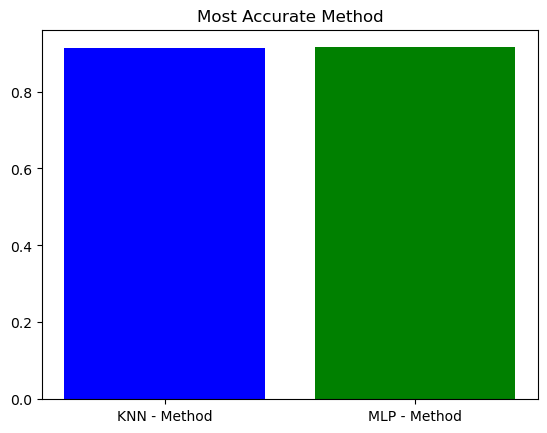

In [161]:
models = ['KNN - Method' , 'MLP - Method']
acc_scores = [knn_final_value, mlp_predict ]
plt.bar(models, acc_scores, color=['blue', 'green'])
plt.title("Most Accurate Method")
plt.show()